# Data prepping

https://bioinf.nl/~davelangers/datasets/abstracts.zip

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras

2022-06-07 10:31:26.810947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 10:31:26.810969: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import abstracts
?abstracts.load_data

In [3]:
(x_train, y_train), (x_test, y_test) = abstracts.load_data(num_words=10000)

In [4]:
x_train.shape, x_train.dtype

((3926,), dtype('O'))

In [5]:
type(x_train[0])

list

In [6]:
word_index = abstracts.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in x_train[0]])
decoded_review

'? reducing excessive ? tonic inhibition promotes functional recovery after stroke stroke is a leading cause of disability but no pharmacological therapy is currently available for promoting recovery the brain region adjacent to stroke ? ? ? critical for ? as it shows heightened ? allowing sensorimotor functions to ? from damaged areas thus understanding the neuronal properties constraining this plasticity is important for the development of new treatments here we show that after a stroke in mice tonic neuronal inhibition is increased in the ? zone this increased tonic inhibition is mediated by extrasynaptic gabaa receptors and is caused by an impairment in gaba γ-aminobutyric acid transporter ? ? function to counteract the heightened inhibition we administered in vivo a ? inverse agonist specific for ? extrasynaptic gabaa receptors at a delay after stroke this treatment produced an early and sustained recovery of motor function genetically lowering the number of α5 or ? gabaa receptor

In [7]:
import numpy as np

def vectorize(x_lists):
    x_new = np.zeros((len(x_lists), 10000))  # 10.000 words
    for row, word_list in enumerate(x_lists):
        for word in word_list:
            x_new[row, word] = 1.0
    return x_new

x_train = vectorize(x_train)
x_test = vectorize(x_test)

In [8]:
y_test.shape, y_test.dtype

((982,), dtype('int64'))

In [9]:
y_test[0]

1

In [10]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [11]:
# create model
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(10000,), name='Input'))  # use 10, to add as tuple, we have 10 samples
neural.add(keras.layers.Dense(units=64, activation='tanh', name='Hidden_1'))
neural.add(keras.layers.Dense(units=16, activation='tanh', name='Hidden_2'))
neural.add(keras.layers.Dense(units=1, activation='sigmoid', name='Output'))

neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 64)                640064    
                                                                 
 Hidden_2 (Dense)            (None, 16)                1040      
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 641,121
Trainable params: 641,121
Non-trainable params: 0
_________________________________________________________________


2022-06-07 10:31:37.832550: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-07 10:31:37.832583: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-07 10:31:37.832602: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nuc417.bin.bioinf.nl): /proc/driver/nvidia/version does not exist
2022-06-07 10:31:37.832782: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
neural.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.SGD(),
    metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.AUC()]
)
history = neural.fit(
    x=x_train,
    y=y_train,
    epochs=8,
    batch_size=50,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/8
79/79 [==============================] - 1s 7ms/step - loss: 0.6412 - binary_accuracy: 0.6791 - auc: 0.7648 - val_loss: 0.5908 - val_binary_accuracy: 0.8279 - val_auc: 0.8946
Epoch 2/8
79/79 [==============================] - 0s 5ms/step - loss: 0.5395 - binary_accuracy: 0.8574 - auc: 0.9334 - val_loss: 0.5018 - val_binary_accuracy: 0.8768 - val_auc: 0.9387
Epoch 3/8
79/79 [==============================] - 0s 4ms/step - loss: 0.4510 - binary_accuracy: 0.8953 - auc: 0.9541 - val_loss: 0.4271 - val_binary_accuracy: 0.8849 - val_auc: 0.9499
Epoch 4/8
79/79 [==============================] - 0s 4ms/step - loss: 0.3787 - binary_accuracy: 0.9063 - auc: 0.9624 - val_loss: 0.3684 - val_binary_accuracy: 0.8982 - val_auc: 0.9540
Epoch 5/8
79/79 [==============================] - 0s 4ms/step - loss: 0.3242 - binary_accuracy: 0.9126 - auc: 0.9668 - val_loss: 0.3272 - val_binary_accuracy: 0.9073 - val_auc: 0.9565
Epoch 6/8
79/79 [==============================] - 0s 4ms/step - loss: 0.28

In [13]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'auc', 'val_loss', 'val_binary_accuracy', 'val_auc'])

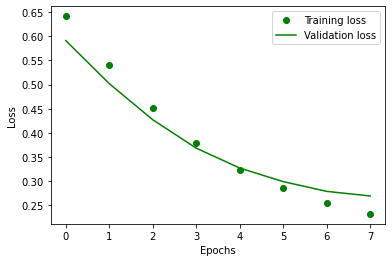

In [14]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Cross validation methods

* Separate test and train data
* Holdout (split data)
* Repeated holdout (Repeat and shuffle)
* k-fold Cross validation
* Leave one out


In [17]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

In [20]:
yhat_test = neural.predict(x_test)
label_test = np.round(yhat_test)

31/31 [==============================] - 0s 2ms/step


In [21]:
print(f'Acc: {accuracy_score(y_test, label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(y_test, label_test):.3}')
print(f'AUC: {roc_auc_score(y_test, yhat_test):.3}')

Acc: 0.902
bAcc: 0.903
AUC: 0.962


In [23]:
from sklearn.metrics import confusion_matrix

conmat = confusion_matrix(y_test, label_test)
conmat

array([[420,  37],
       [ 59, 466]])

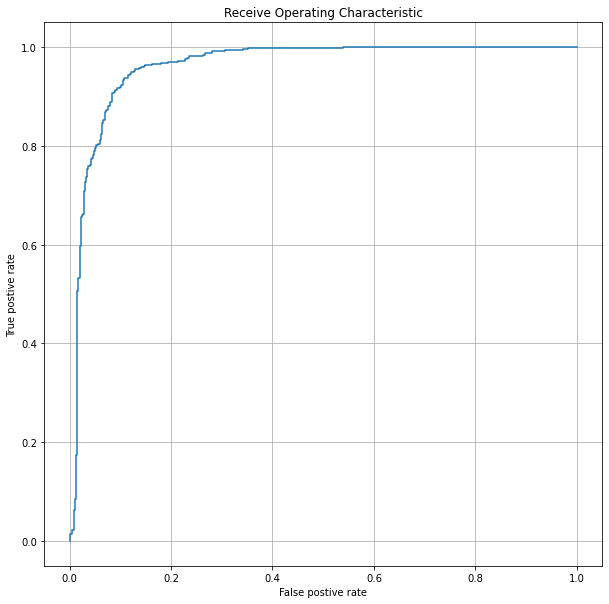

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, yhat_test)

fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr)
plt.title('Receive Operating Characteristic')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.grid(True)
plt.show()

In [15]:
neural.evaluate(x_test, y_test)

31/31 [==============================] - 0s 2ms/step - loss: 0.2694 - binary_accuracy: 0.9022 - auc: 0.9616


[0.269400030374527, 0.9022403359413147, 0.9615525007247925]

In [16]:
yhat = neural.predict(x_test)

31/31 [==============================] - 0s 2ms/step
